In [49]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import display

In [206]:
#img = Image.open('images/img3.jpg')
#img = Image.open('images/high_contrast.jpg')
#img = Image.open('images/test.jpg')
#img = Image.open('images/test.png')
img = Image.open('images/office_1.jpg')

In [207]:
img = np.array(img)

gray_img = np.empty((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #sum = 0;
        mi = 25
        mx = 0
        for k in range(img.shape[2]):
            mx = max(mx, img[i][j][k])
            mi = min(mi, img[i][j][k])
            #sum += img[i][j][k]

        #gray_img[i][j] = sum // 3
        t = mx +  mi
        t = t // 2
        gray_img[i][j] = t

In [208]:
g = Image.fromarray(gray_img)

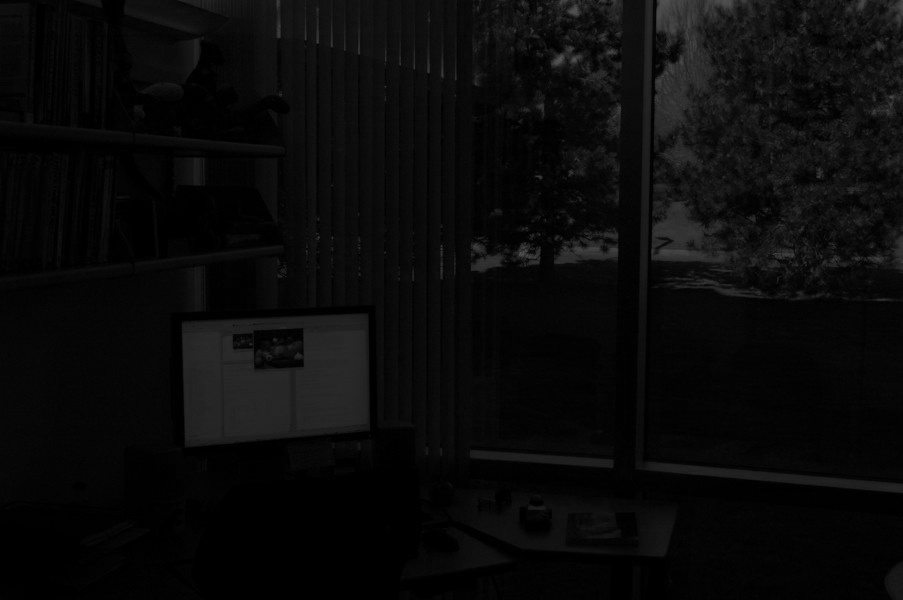

In [209]:
display(g)

In [210]:
values = [x for x in range(256)]
freq = [0 for x in range(256)]

In [211]:
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        freq[gray_img[i][j]] += 1

(array([5.4356e+04, 3.4993e+04, 3.2026e+04, 4.3450e+04, 4.3973e+04,
        4.1529e+04, 3.9234e+04, 2.6968e+04, 2.0883e+04, 1.8347e+04,
        1.6955e+04, 1.5416e+04, 1.4423e+04, 1.2913e+04, 1.1584e+04,
        1.0396e+04, 9.0400e+03, 7.2330e+03, 6.0920e+03, 5.2770e+03,
        4.9400e+03, 4.4110e+03, 4.0020e+03, 3.4010e+03, 3.0320e+03,
        2.9140e+03, 2.5900e+03, 2.4050e+03, 2.4650e+03, 2.8020e+03,
        2.9150e+03, 2.7350e+03, 2.6390e+03, 2.2630e+03, 2.0440e+03,
        2.1960e+03, 2.7010e+03, 3.3460e+03, 4.4860e+03, 3.7610e+03,
        2.6920e+03, 1.6300e+03, 8.8700e+02, 7.7100e+02, 7.6200e+02,
        7.5100e+02, 7.6600e+02, 7.2300e+02, 5.5900e+02, 5.9600e+02,
        5.7500e+02, 4.6200e+02, 4.0300e+02, 3.2700e+02, 2.5100e+02,
        2.4100e+02, 2.0900e+02, 2.0900e+02, 1.7200e+02, 1.6300e+02,
        1.4700e+02, 1.4300e+02, 1.2100e+02, 1.1700e+02, 1.2000e+02,
        1.3500e+02, 1.0500e+02, 8.5000e+01, 6.1000e+01, 8.5000e+01,
        5.4000e+01, 4.0000e+01, 4.5000e+01, 4.70

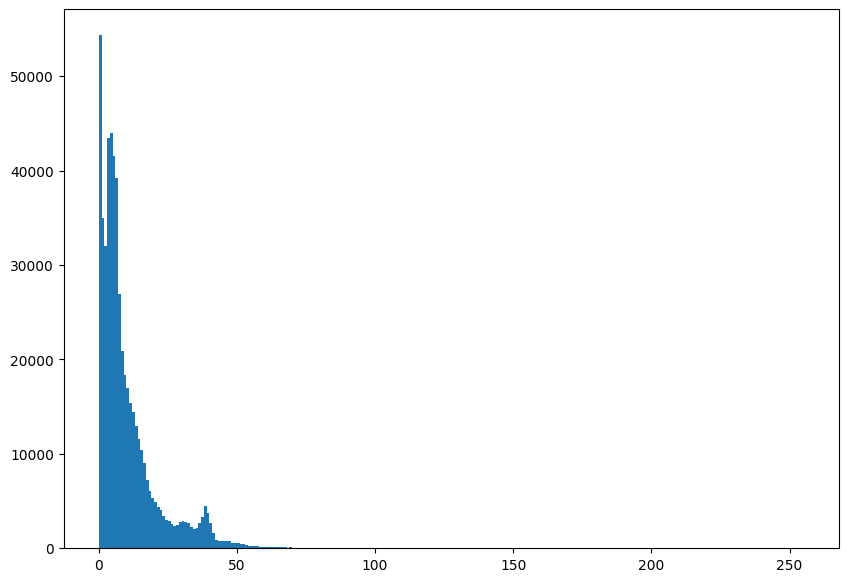

In [212]:
new_gray = []
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        new_gray.append(gray_img[i][j])

fig, axs = plt.subplots(figsize=(10,7))
axs.hist(new_gray, bins=values)

In [215]:
accumulation = 0;

new_map = [0 for x in range(len(freq))]
for i in range(len(freq)):
    accumulation += freq[i]
    prob = accumulation / (gray_img.shape[0] * gray_img.shape[1])
    prob *= (len(freq) - 1)
    new_map[i] = round(prob)

In [216]:
new_img = np.empty(gray_img.shape, dtype=np.uint8)

for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        new_img[i][j] = new_map[gray_img[i][j]]

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 54356.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 34993.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32026.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0., 43450.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 43973.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

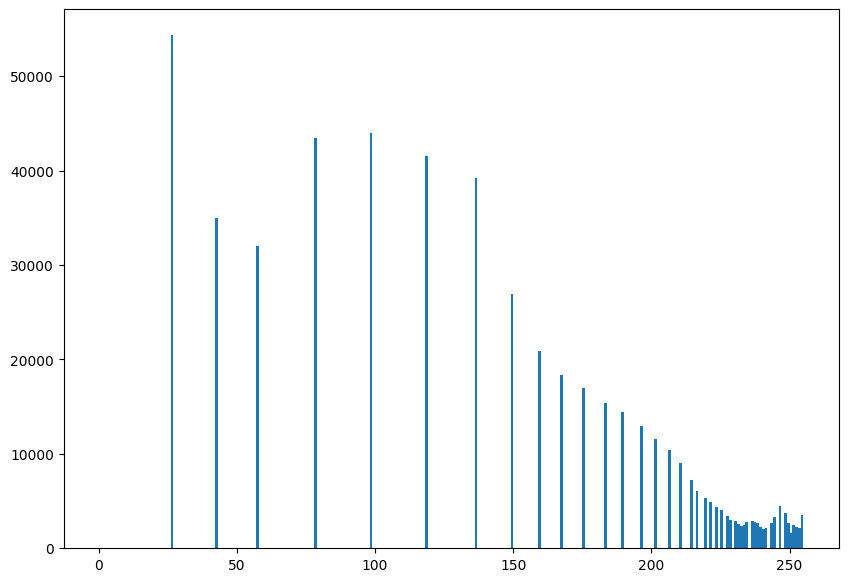

In [217]:
new_gray = []
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        new_gray.append(new_img[i][j])

fig, axs = plt.subplots(figsize=(10,7))
axs.hist(new_gray, bins=values)

In [219]:
new_enhanced_img = Image.fromarray(new_img)

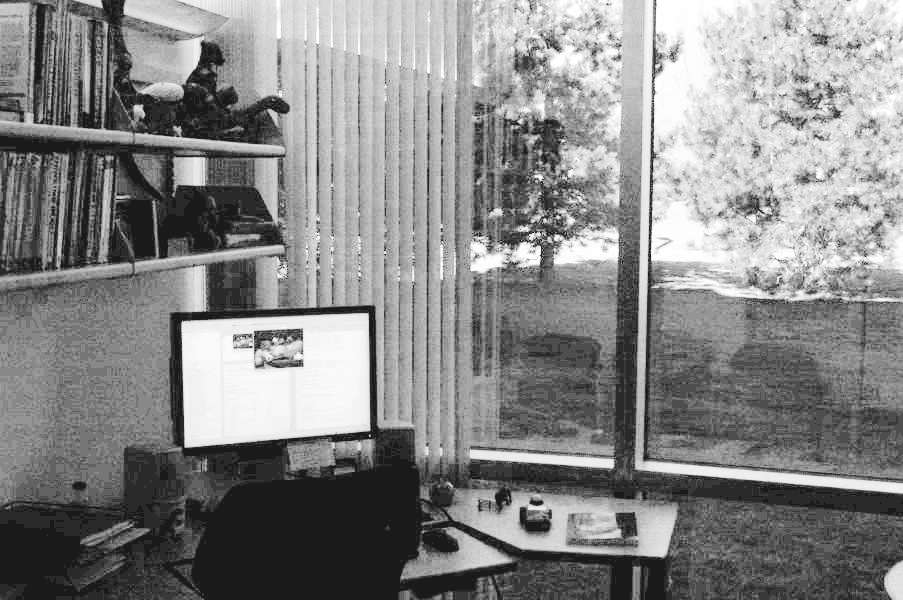

In [220]:
display(new_enhanced_img)

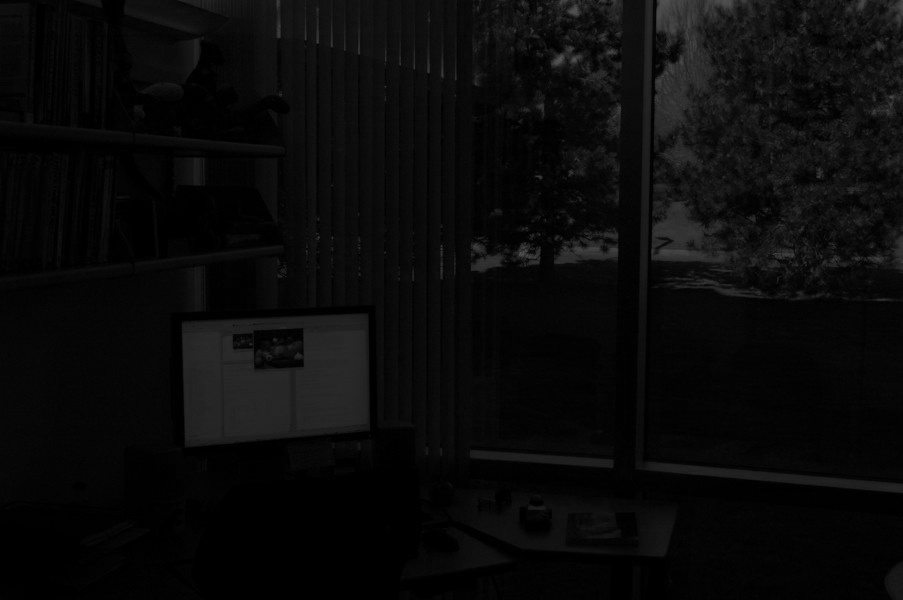

In [221]:
display(g)